In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '5d6dc9d8ff35442884e2ecd207c158fe')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'German Flag')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
dest = '/images/GermanFlag.jpg'
download_url(ims[0], dest)

Path('/images/GermanFlag.jpg')

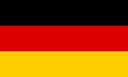

In [7]:
im = Image.open(dest)
im.to_thumb(128,128)

In [8]:
flag_types = 'Germany','Bulgary','Netherlands'
path = Path('flags')

In [9]:
if not path.exists():
    path.mkdir()
    for o in flag_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} flag')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#416) [Path('flags/Germany/70946576-af25-449d-b247-b9cd1748969c.jpg'),Path('flags/Germany/203db566-d9f9-4a15-9953-39c6ebb27c2c.jpg'),Path('flags/Germany/7f7fb6d3-79d8-4f4a-87d6-f5a9a7f3288f.jpg'),Path('flags/Germany/30d28845-608f-4557-8b2a-dfc3f96855b8.png'),Path('flags/Germany/e0999cdc-c799-4048-bdf6-e30375d82a53.jpg'),Path('flags/Germany/b9329116-b99c-4c4b-8eb2-3416c7ddd45b.jpg'),Path('flags/Germany/435b56c9-f161-4481-add5-22daa6f1fa86.png'),Path('flags/Germany/c98d7fb8-d7f9-4a13-9572-6d98a1d767dc.jpg'),Path('flags/Germany/48824a6d-d0c5-4ae0-922b-3e57bf1dacf5.png'),Path('flags/Germany/b9dd4320-4d17-4842-a098-4f04f9bce94e.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#7) [Path('flags/Germany/64d3ba4c-eb9a-4a82-96aa-6f47aa72cb83.jpg'),Path('flags/Germany/baa9932a-aa7c-45a7-9df3-662a10d2056c.jpg'),Path('flags/Germany/a0b5cf83-6f05-4012-ac4d-b6e9f84036e6.jpg'),Path('flags/Bulgary/4579f148-9618-4f2f-9f98-fbd7b20d2b6d.jpg'),Path('flags/Bulgary/25367a7c-4d82-41f0-bf21-5ef94315e4bc.jpg'),Path('flags/Netherlands/dd2caff9-7faa-4799-b0ab-e5bb813bf1d0.png'),Path('flags/Netherlands/74f29835-5fb3-4b97-baa5-e6f18f09ba76.jpg')]

In [12]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [13]:
flags = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
dls = flags.dataloaders(path)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


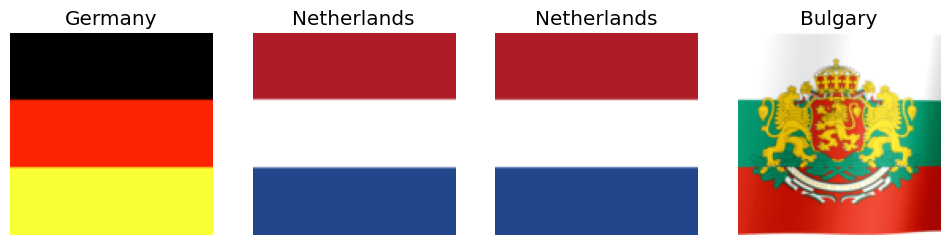

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

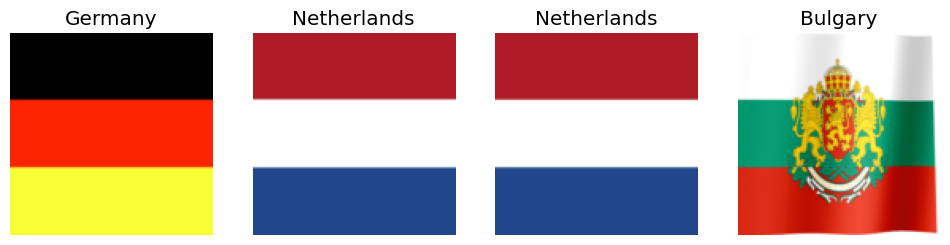

In [16]:
flags = flags.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = flags.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

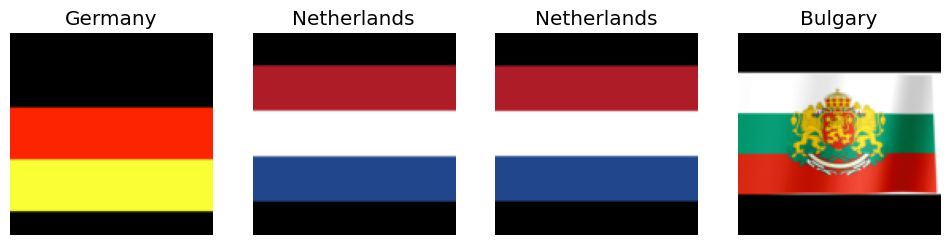

In [17]:
flags = flags.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = flags.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

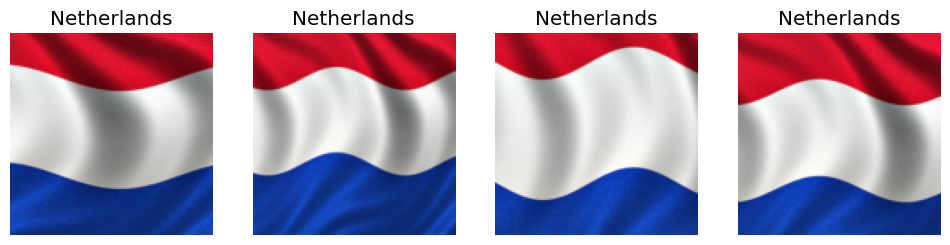

In [18]:
flags = flags.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = flags.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

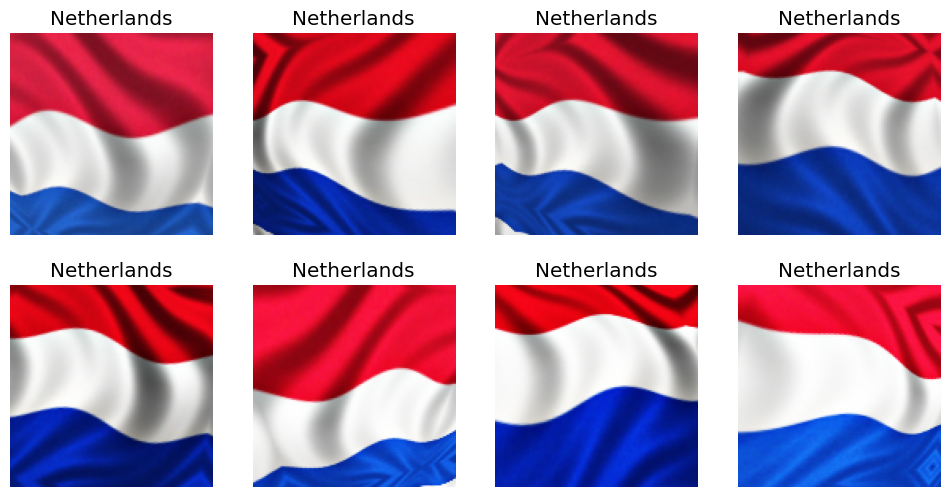

In [19]:
flags = flags.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = flags.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [20]:
flags = flags.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = flags.dataloaders(path)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 189MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.241546,0.789699,0.246914,01:40


epoch,train_loss,valid_loss,error_rate,time
0,0.438834,0.457570,0.185185,02:12
1,0.336643,0.237183,0.098765,02:14
2,0.260098,0.193585,0.074074,02:18
3,0.207030,0.169329,0.074074,02:14


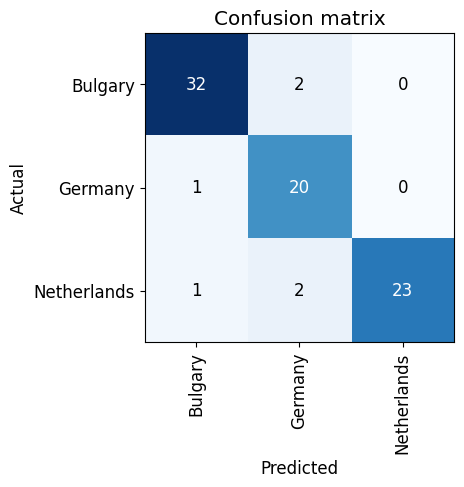

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

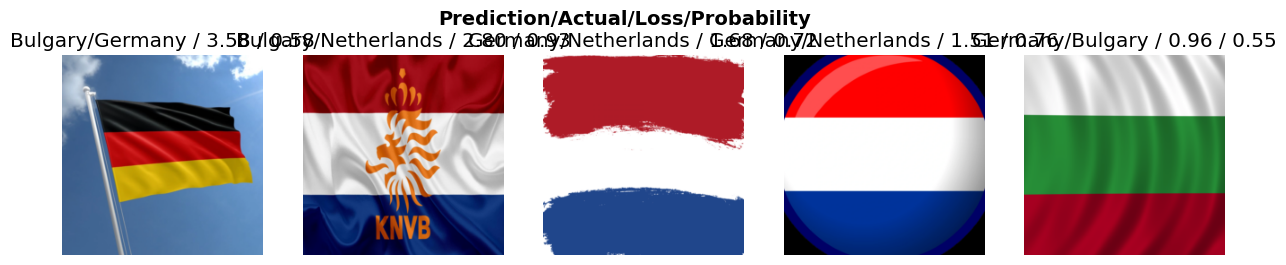

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## Turning Your Model into an Online Application

### Using the Model for Inference

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
print(path/'export.pkl')

export.pkl


In [30]:
learn_inf.predict('/content/images/GermanFlag.jpeg')

('Germany', tensor(1), tensor([0.0516, 0.9326, 0.0158]))

In [31]:
learn_inf.dls.vocab

['Bulgary', 'Germany', 'Netherlands']

### Creating a Notebook App from the Model

In [32]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Bulgary; Probability: 1.0000')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
VBox([widgets.Label('Select your Flag!'), 
      btn_upload, btn_run, out_pl, lbl_pred])